In [ ]:
#1_IMPORTO LIBRERIAS
import pandas as pd
from datetime import datetime, timedelta

In [ ]:
#2_UNO LOS 4 ARCHIVOS QUE CONTIENEN INFORMACIÓN DE ALTAS HOSPITALARIAS CON DIAGNOSTICO INFARTO AGUDO DE MIOCARDIO AÑOS 2022, 2023, 2024 Y 2025
import pandas as pd

# URLs of the files
url='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Infarto_agudo_de_miocardio_2022.csv'
url1='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Infarto_agudo_de_miocardio_2023.csv'
url2='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Infarto_agudo_de_miocardio_2024.csv'
url3='https://datosabiertos.saludcastillayleon.es/data/datos/Altas_hospitalarias_con_diagnostico_de_Infarto_agudo_de_miocardio_2025.csv'

urls = [url, url1, url2, url3]

# Read and concatenate the CSV files from the URLs
df = pd.concat((pd.read_csv(url, encoding='latin-1', delimiter=';') for url in urls), ignore_index=True)

# Display the first few rows of the combined dataframe
display(df.head())
display(df.info())

,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo
0,01/01/2022 02:01:00,06/01/2022 15:38:00,Sábado,Jueves,Z.B.S. Los Cubos,Urbano,C.A.U. Burgos,Burgos,Burgos,64,Mujer
1,01/01/2022 04:29:00,08/01/2022 13:00:00,Sábado,Sábado,Z.B.S. Eras de Renueva,Urbano,C.A.U. León,León,León,72,Hombre
2,01/01/2022 04:31:00,04/01/2022 04:20:00,Sábado,Martes,Z.B.S. Venta de Baños,Rural,C.A.U. Palencia,Palencia,Palencia,88,Mujer
3,01/01/2022 06:31:00,05/01/2022 16:29:00,Sábado,Miércoles,Z.B.S. Alcañices,Rural,C.A.U. Salamanca,Salamanca,Salamanca,70,Hombre
4,01/01/2022 11:32:00,18/01/2022 15:12:00,Sábado,Martes,Z.B.S. Camarzana de Tera,Rural,C.A.U. Salamanca,Salamanca,Salamanca,87,Hombre


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12023 entries, 0 to 12022
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Fecha de ingreso                          12023 non-null  object
 1   Fecha de alta                             12023 non-null  object
 2   Día de la semana en la fecha del ingreso  12023 non-null  object
 3   Día de la semana en la fecha del alta     12023 non-null  object
 4   Zona Básica de Salud del Paciente         12020 non-null  object
 5   Ámbito de procedencia                     12020 non-null  object
 6   Hospital                                  12023 non-null  object
 7   Área                                      12023 non-null  object
 8   Provincia                                 12023 non-null  object
 9   Edad                                      12023 non-null  int64 
 10  Sexo                                      1202

None

In [ ]:
# 3_CONVIERTO FECHAS EN DATATIME
df['Fecha de ingreso'] = pd.to_datetime(df['Fecha de ingreso'], format='%d/%m/%Y %H:%M:%S')
df['Fecha de alta'] = pd.to_datetime(df['Fecha de alta'], format='%d/%m/%Y %H:%M:%S')

In [ ]:
# GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
df.to_csv('altas_hospitalarias_con_diagnostico_infarto_agudo_miorcardio.csv', index=False)

In [ ]:
# 4_AGREGO UNA COLUMNA 'FECHA HOSPITALIZADO' QUE CONTIENE LA FECHA EN QUE UNA PERSONA ESTA INTERNADA Y AGREGRO UNA FILA POR CADA DÍA QUE LA PERSONA ESTA HOSPITALIZADA PARA PODER FINALMENTE TENER LA INFORMACIÓN DE INTERNACIÓN
# POR DIA POR HOSPITAL

expanded_rows = []

for _, row in df.iterrows():
    ingreso = row['Fecha de ingreso']
    alta = row['Fecha de alta']
    current_date = ingreso.date()
    while current_date <= alta.date():
        new_row = row.copy()
        new_row['fecha_infarto_miorcardio'] = current_date
        expanded_rows.append(new_row)
        current_date += timedelta(days=1)

# Crear nuevo DataFrame expandido
expanded_df = pd.DataFrame(expanded_rows)

In [ ]:
# 5_ESTA NUEVA COLUMNA 'FECHA HOSPITALIZADO' LA CONVIERTO EN OBJETO DATATIME
expanded_df['fecha_infarto_miorcardio'] = pd.to_datetime(expanded_df['fecha_infarto_miorcardio'])



In [ ]:
# 6_PARA CHEQUEAR INFO NUEVA
display(expanded_df.head())
display(expanded_df.tail())
display(expanded_df.info())

,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo,fecha_infarto_miorcardio
0,2022-01-01 02:01:00,2022-01-06 15:38:00,Sábado,Jueves,Z.B.S. Los Cubos,Urbano,C.A.U. Burgos,Burgos,Burgos,64,Mujer,2022-01-01
0,2022-01-01 02:01:00,2022-01-06 15:38:00,Sábado,Jueves,Z.B.S. Los Cubos,Urbano,C.A.U. Burgos,Burgos,Burgos,64,Mujer,2022-01-02
0,2022-01-01 02:01:00,2022-01-06 15:38:00,Sábado,Jueves,Z.B.S. Los Cubos,Urbano,C.A.U. Burgos,Burgos,Burgos,64,Mujer,2022-01-03
0,2022-01-01 02:01:00,2022-01-06 15:38:00,Sábado,Jueves,Z.B.S. Los Cubos,Urbano,C.A.U. Burgos,Burgos,Burgos,64,Mujer,2022-01-04
0,2022-01-01 02:01:00,2022-01-06 15:38:00,Sábado,Jueves,Z.B.S. Los Cubos,Urbano,C.A.U. Burgos,Burgos,Burgos,64,Mujer,2022-01-05


,Fecha de ingreso,Fecha de alta,Día de la semana en la fecha del ingreso,Día de la semana en la fecha del alta,Zona Básica de Salud del Paciente,Ámbito de procedencia,Hospital,Área,Provincia,Edad,Sexo,fecha_infarto_miorcardio
12022,2024-12-31 23:05:00,2025-01-22 15:37:00,Martes,Miércoles,Z.B.S. Segovia Rural,Rural,C.A. Segovia,Segovia,Segovia,77,Hombre,2025-01-18
12022,2024-12-31 23:05:00,2025-01-22 15:37:00,Martes,Miércoles,Z.B.S. Segovia Rural,Rural,C.A. Segovia,Segovia,Segovia,77,Hombre,2025-01-19
12022,2024-12-31 23:05:00,2025-01-22 15:37:00,Martes,Miércoles,Z.B.S. Segovia Rural,Rural,C.A. Segovia,Segovia,Segovia,77,Hombre,2025-01-20
12022,2024-12-31 23:05:00,2025-01-22 15:37:00,Martes,Miércoles,Z.B.S. Segovia Rural,Rural,C.A. Segovia,Segovia,Segovia,77,Hombre,2025-01-21
12022,2024-12-31 23:05:00,2025-01-22 15:37:00,Martes,Miércoles,Z.B.S. Segovia Rural,Rural,C.A. Segovia,Segovia,Segovia,77,Hombre,2025-01-22


<class 'pandas.core.frame.DataFrame'>
Index: 85901 entries, 0 to 12022
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Fecha de ingreso                          85901 non-null  datetime64[ns]
 1   Fecha de alta                             85901 non-null  datetime64[ns]
 2   Día de la semana en la fecha del ingreso  85901 non-null  object        
 3   Día de la semana en la fecha del alta     85901 non-null  object        
 4   Zona Básica de Salud del Paciente         85891 non-null  object        
 5   Ámbito de procedencia                     85891 non-null  object        
 6   Hospital                                  85901 non-null  object        
 7   Área                                      85901 non-null  object        
 8   Provincia                                 85901 non-null  object        
 9   Edad                             

None

In [ ]:
#7 TOTAL DE PACIENTES HOSPITALIZADOS POR DÍA POR HOSPITAL
Ocupación_total_diaria = expanded_df.groupby(['fecha_infarto_miorcardio', 'Hospital']).size().reset_index(name='Occupancy')

Ocupación_total_diaria.head()

,fecha_infarto_miorcardio,Hospital,Occupancy
0,2021-10-23,C.A.U. León,1
1,2021-10-24,C.A.U. León,1
2,2021-10-25,C.A.U. León,1
3,2021-10-26,C.A.U. León,1
4,2021-10-27,C.A.U. León,1


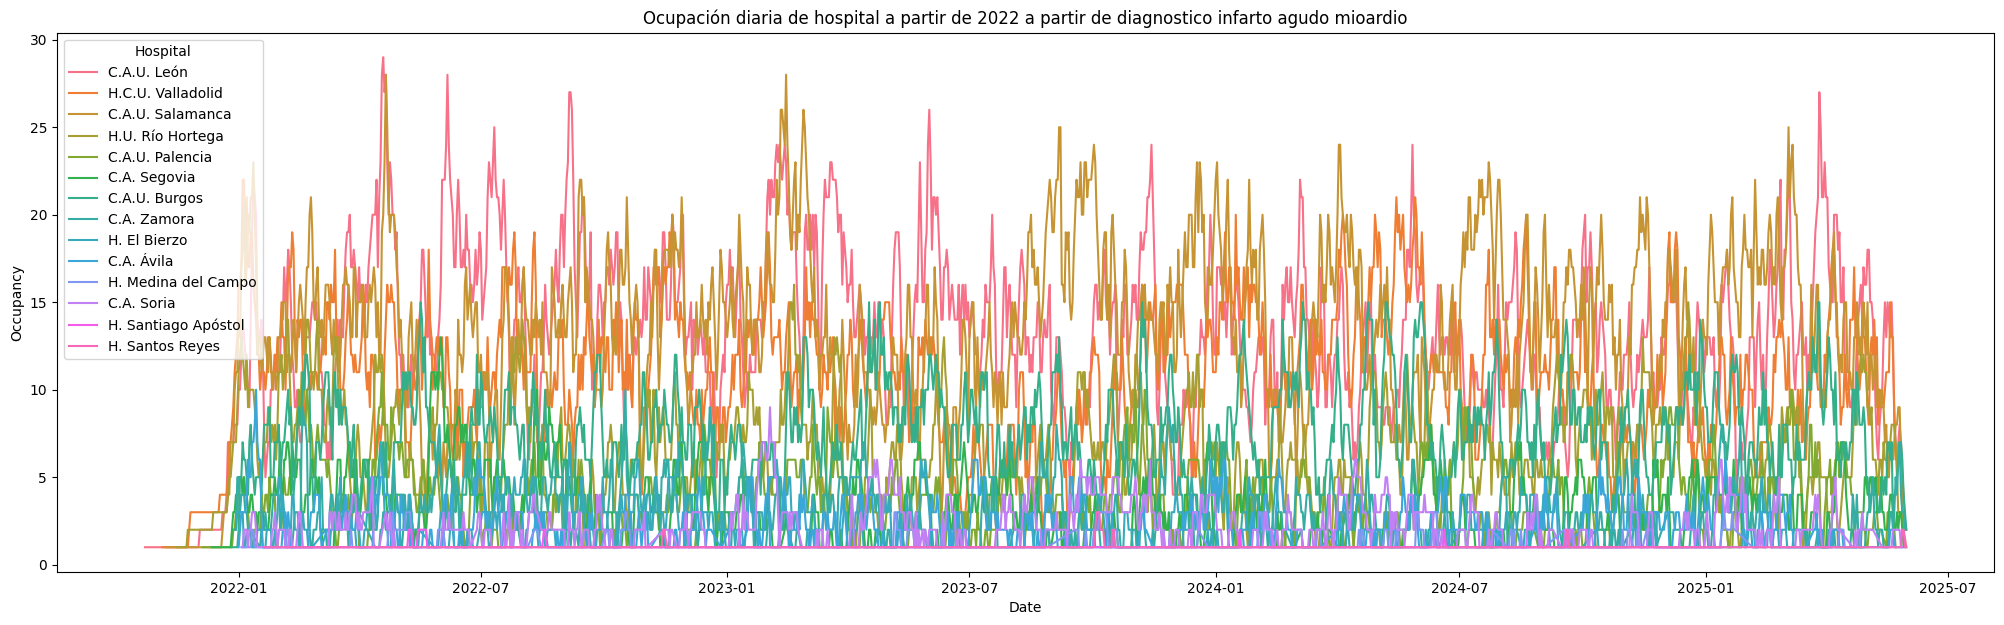

In [ ]:
#7_VER LOS REULTADOS GRAFICADOS POR DÍA POR HOSPITAL

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 7))
sns.lineplot(data=Ocupación_total_diaria, x='fecha_infarto_miorcardio', y='Occupancy', hue='Hospital')
plt.title('Ocupación diaria de hospital a partir de 2022 a partir de diagnostico infarto agudo mioardio')
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.show()

In [ ]:
#8 GUARDAR LOS RESULTADOS EN UN ARCHIVO .CSV
Ocupación_total_diaria.to_csv('Ocupación_total_diaria_hospitalaria_infarto_agudo_miorcardio.csv', index=False)
